In [11]:
import os
import pandas as pd
import yfinance as yf
import talib



In [12]:
# read csv files
data = pd.read_csv('C:/Users/hp/Desktop/week1/data/AAPL_historical_data.csv')
data = pd.read_csv('C:/Users/hp/Desktop/week1/data/AMZN_historical_data.csv')
data = pd.read_csv('C:/Users/hp/Desktop/week1/data/GOOG_historical_data.csv')
data = pd.read_csv('C:/Users/hp/Desktop/week1/data/META_historical_data.csv')
data = pd.read_csv('C:/Users/hp/Desktop/week1/data/MSFT_historical_data.csv')
data = pd.read_csv('C:/Users/hp/Desktop/week1/data/NVDA_historical_data.csv')
data = pd.read_csv('C:/Users/hp/Desktop/week1/data/TSLA_historical_data.csv')


In [20]:
# Define the ticker symbol and fetch the data
ticker_symbol = 'AAPL'
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2024-01-01')

# Calculate Moving Averages
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)  # 20-day Simple Moving Average
stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)  # 50-day Simple Moving Average

# Calculate RSI (Relative Strength Index)
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)  # 14-day RSI

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
stock_data['MACD'] = macd
stock_data['MACD_Signal'] = macdsignal
stock_data['MACD_Hist'] = macdhist

# Print the DataFrame with added indicators
print(stock_data.tail())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  195.179993  195.410004  192.970001  193.600006  192.868149   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.320221   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.419830   
2023-12-28  194.139999  194.660004  193.169998  193.580002  192.848206   
2023-12-29  193.899994  194.399994  191.729996  192.529999  191.802170   

              Volume      SMA_20      SMA_50        RSI      MACD  \
Date                                                                
2023-12-22  37122800  193.668501  185.398801  54.609715  2.636317   
2023-12-26  28919300  193.831501  185.682801  53.026884  2.306308   
2023-12-27  48087700  193.969001  185.971400  53.291939  2.029448   
2023-12-28  34049900  194.179501  186.300001  54.481471  1.823710   
2023-12-29  42628800  194.308501  186.633801  51.061838  1.557975  

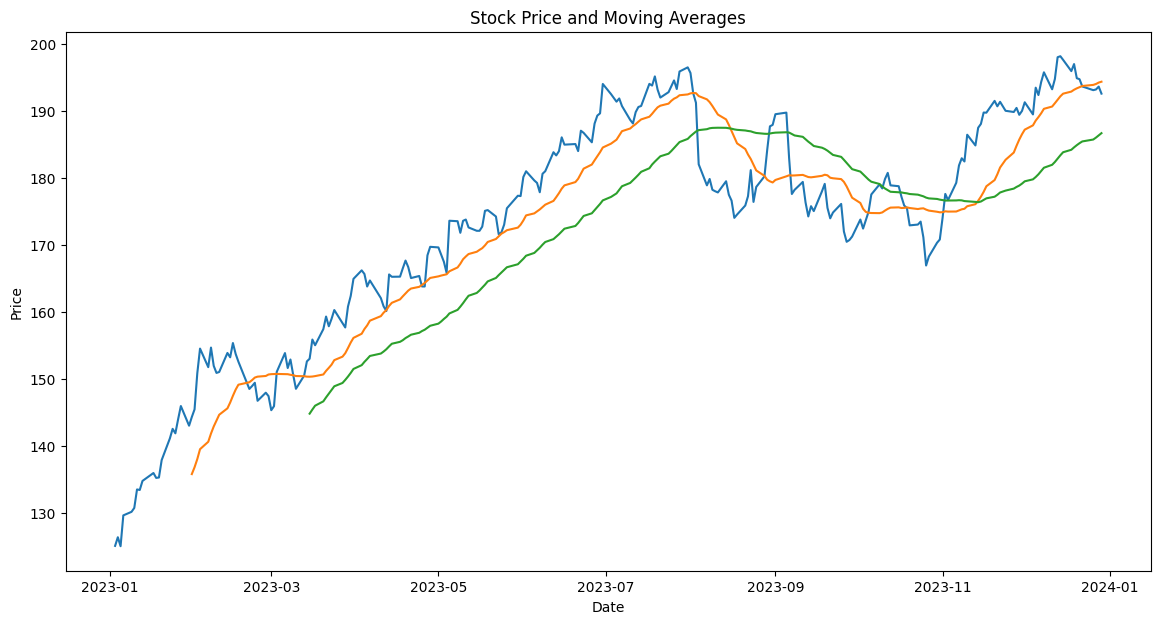

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot stock price and moving averages
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA_20'], label='20-Day SMA')
plt.plot(stock_data['SMA_50'], label='50-Day SMA')

plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


[*********************100%***********************]  1 of 1 completed

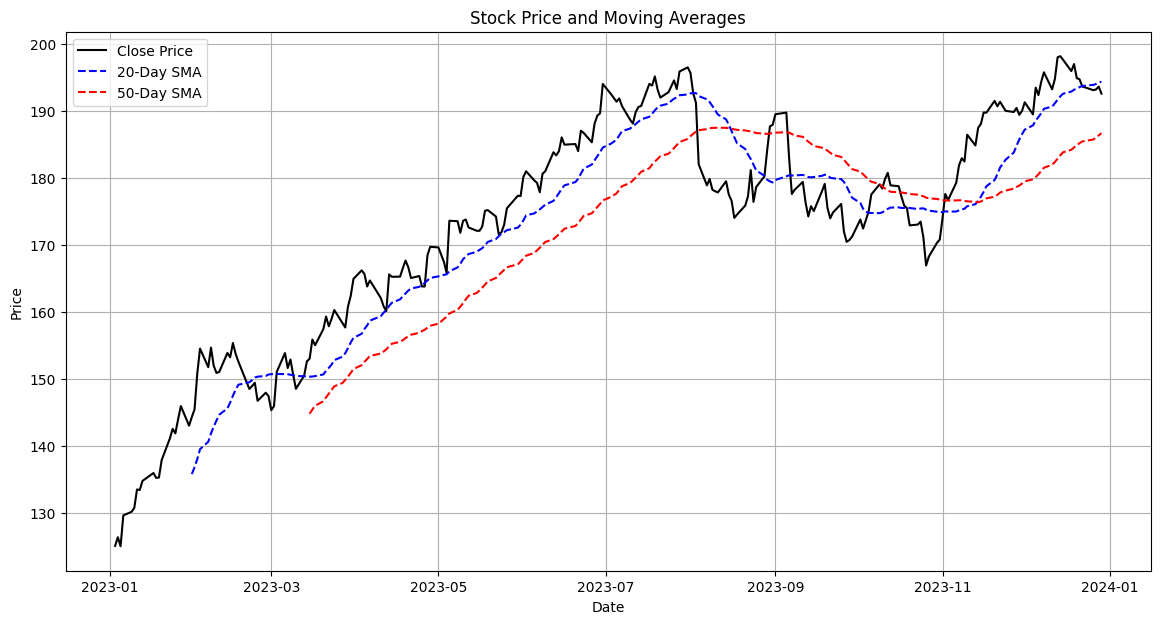

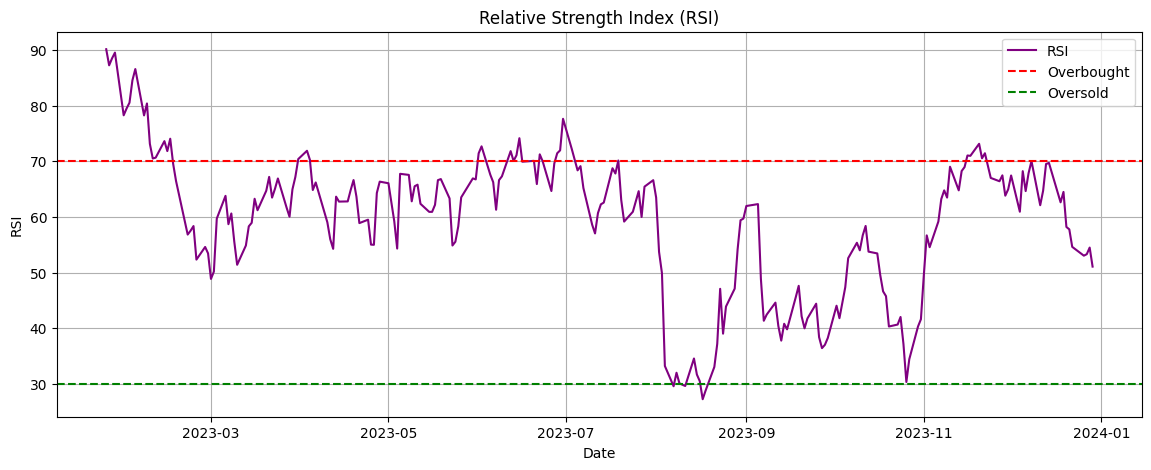

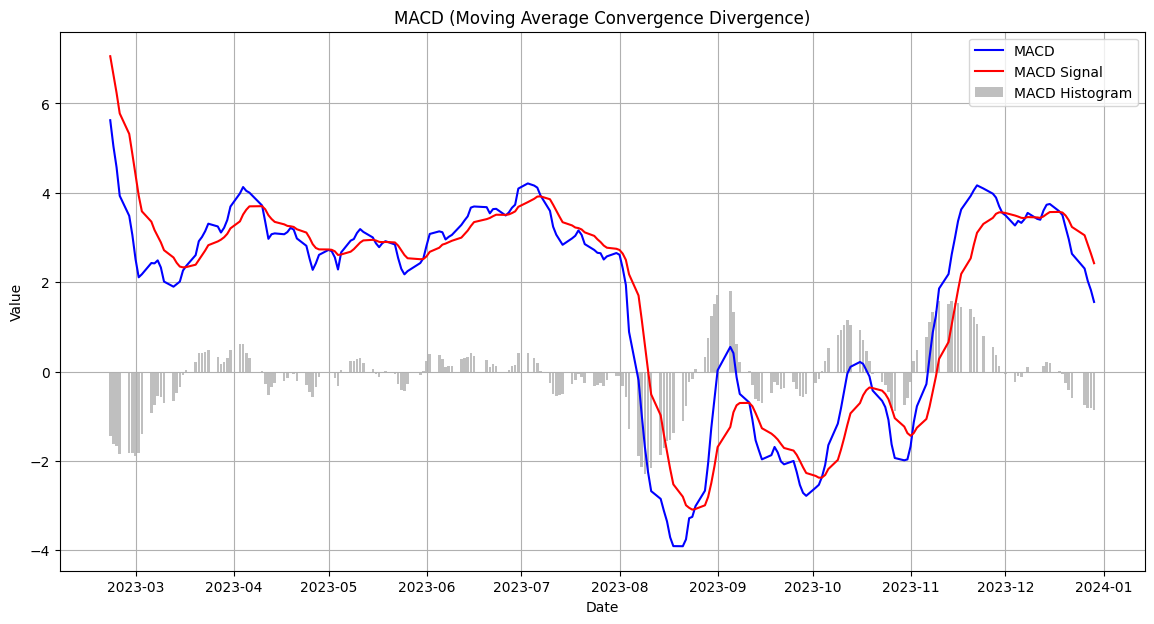

In [29]:
# Fetch the data
ticker_symbol = 'AAPL'
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2024-01-01')

# Calculate indicators
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
macd, macdsignal, macdhist = talib.MACD(stock_data['Close'])
stock_data['MACD'] = macd
stock_data['MACD_Signal'] = macdsignal
stock_data['MACD_Hist'] = macdhist

# Plot stock price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price', color='black', linewidth=1.5)
plt.plot(stock_data['SMA_20'], label='20-Day SMA', color='blue', linestyle='--')
plt.plot(stock_data['SMA_50'], label='50-Day SMA', color='red', linestyle='--')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(14, 5))
plt.plot(stock_data['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(stock_data.index, stock_data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('MACD (Moving Average Convergence Divergence)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
